Troy Mazerolle

Student Number: 8972394

# Lab 2 - Probability and Statistics

In [2]:
# Uitility Libraries
import numpy as np
import pandas as pd

# Plotting Libraries
import matplotlib.pyplot as plt

# Sci-Kit Learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

## Part A

Preprocessing
* Load the dataset

In [2]:
lab2Data = pd.read_csv("../../practical_labs/datasets/Lab_2/Lab2_dataset.csv")
lab2Data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size.

* The CountVectorizer() function creates an m by n matrix, where m is the amount of rows in the original data set and n is the total number of unique words observed in the `text` column in the original data.  The matrix rows contains the count of each word represented by the corresponding column.

To visualize this, we will get the vectorized data, and convert the data into a dataframe with the corresponding column names.  

In [3]:
vectorizer = CountVectorizer()
vectorizedData = pd.DataFrame(vectorizer.fit_transform(lab2Data['text']).toarray(), columns = vectorizer.get_feature_names_out())
vectorizedData.head()

,00,000,0000,000000,000000000002858,000000000049773,000080,000099,0001,00018,...,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzn,zzo,zzocb,zzso,zzsyt
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After converting the matrix to a dataframe, we get the above output.  Most of the elements are 0, meaning that the first five messages in the original data do not contain most of the displayed words that are currently shown.  However, the [0,0] element of the matrix is 1, meaning that the very first observation in the original data set contains the string "00", and the string occurs one time.

Basically, we are trying to determine whether or not a message is spam given the counts of words that are contained in the messages.  Since the rows of the original dataframe correspond to the rows of the above dataframe of word counts, we do not need to worry about realigning them.  We want to predict the value of label_num (which directly corresponds to label) based on the word counts.  This makes label_num the dependent variable we are trying to predict, and the word count dataframe contains the covariates.

We will start by splitting the data into train and test sets.  We will use 90% of the data to train the models and set aside 10% of the data to test the model accuracy.

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(vectorizedData, lab2Data['label_num'],
                                                test_size = 0.1, random_state = 8972394)

### Support Vector Classifier

The baseline model we are going to use is a support vector machine.  

For my own practice, I wrote the code below to perform cross-validation to determine the optimal hyperparameters for a support vector machine on the training data.  Since it will take too long to run, I am commenting it out.  

In [5]:
# svmMod = svm.SVC()
# parameters = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10],
#     'degree': [1,2,3,4,5]
# }

# cv = GridSearchCV(svmMod, parameters, cv = 10)
# cv.fit(vectorizedData, lab2Data['label_num'])

Using the default hyperparameters of the support vector classifier, we train the model below.  The default parameters are a $cost = 1$ and $kernel = "rbf"$.

Accuracy of Support Vector Classifier:  0.959


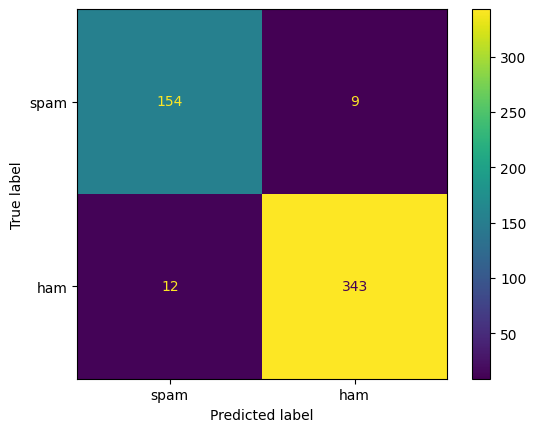

In [6]:
svmMod = svm.SVC()
svmMod.fit(xTrain, yTrain)
yPredSVM = svmMod.predict(xTest)
svmModAccuracy = sum(yTest == yPredSVM) / len(yPredSVM)
confMatSVM = confusion_matrix(yTest, yPredSVM, labels = [1,0])
print(ConfusionMatrixDisplay(confMatSVM, display_labels = ["spam", "ham"]).plot())
print("Accuracy of Support Vector Classifier: ", round(svmModAccuracy, 3))

With the support vector classifier, we get an accuracy of about 95.9%.  We will move on to testing Naive Bayes classifiers to compare the accuracy to.

### Naive Bayes

Bayes formula is written as the following:

$P(y | x_1,...,x_n) = \frac{P(x_1,...,x_n | y)}{P(x_1,...,x_n)}P(y)$

Bayes formula basically defines the relationship between conditional probabilities.  However, the challenge with this form of Bayes formula is that the conditional probabilities are often difficult to determine when they are grouped together, as they are in $P(x_1,...,x_n | y)$.  So, if we assume that $x_1,...,x_n$ are independent of eachother, then the Bayes Formula can be simplified to:

$P(y | x_1,...,x_n) = \frac{P(x_1 | y)...P(x_n | y)}{P(x_1)...P(x_n)}P(y)$

Some would describe this assumption as naive.  However, this assumption makes building models significantly easier.

### Gaussian Naive Bayes

In a Gaussian Naive Bayes model, each covariate is assumed to have a Gaussian distribution, meaning that:

$P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}e^{-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}}$

where $\mu_y$ and $\sigma_y$ are the mean and standard deviation of $y$ respectively.

We will build the Gaussian Naive Bayes model below:

Accuracy of Gaussian Naive Bayes:  0.963


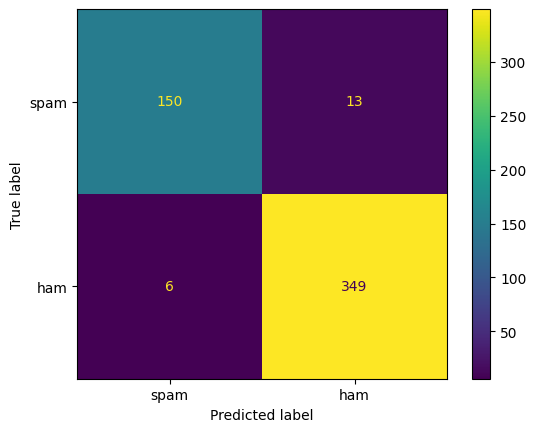

In [7]:
gaussNaiveBayes = GaussianNB()
gaussMod = gaussNaiveBayes.fit(xTrain, yTrain)
yPredGauss = gaussMod.predict(xTest)
confMatGauss = confusion_matrix(yTest, yPredGauss, labels = [1,0])
gaussModAccuracy = sum(yTest == yPredGauss)/len(yPredGauss)
print(ConfusionMatrixDisplay(confMatGauss, display_labels = ["spam", "ham"]).plot())
print("Accuracy of Gaussian Naive Bayes: ", round(gaussModAccuracy, 3))

In total, our Gaussian Naive Bayes predicts 96.3% of our test data correctly.  It predicted 150 spam messages and 349 ham messages correctly, misclassified 6 ham messages as spam, and misclassified 13 spam messages as ham.

We will now build the Multinomial Naive Bayes model, which assumes that the data is multinomial distributed.

Accuracy of Multinomial Naive Bayes:  0.979


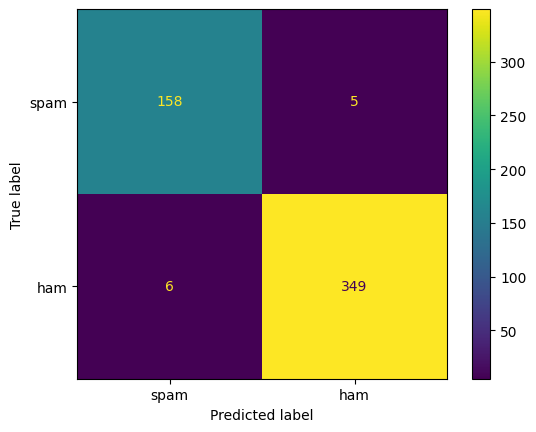

In [8]:
multinomNaiveBayes = MultinomialNB()
multinomMod = multinomNaiveBayes.fit(xTrain, yTrain)
yPredMultinom = multinomMod.predict(xTest)
confMatMultinom = confusion_matrix(yTest, yPredMultinom, labels = [1,0])
multinomModAccuracy = sum(yTest == yPredMultinom)/len(yPredMultinom)
print(ConfusionMatrixDisplay(confMatMultinom, display_labels = ["spam", "ham"]).plot())
print("Accuracy of Multinomial Naive Bayes: ", round(multinomModAccuracy, 3))

In total, our Multinomial Naive Bayes predicts 97.9% of our test data correctly.  It predicted 158 spam messages and 349 ham messages correctly, misclassified 6 ham messages as spam, and misclassified 5 spam messages as ham.

The SVM model has a test prediction accuracy of about 95.9%, while the Gaussian and multinomial naive Bayes have a test prediction accuracy of about 96.3% and 97.9% respectively.  Both naive Bayes models outperform the support vector machine, which I personally find a bit surprising since naive Bayes makes an assumption of independence among covariates, while the SVM model does not.  If I were to guess, since all three models are relatively close in accuracy already, a better-tuned SVM model would outperform both naive Bayes models (although I cannot prove it without finding the optimal hyperparameters of the SVM model).

## Part B

The goal for this part is to remove outliers from the data.  For this question, outliers of the data are considered to be the outliers of the prices under the "Entire home/apt" category.

In [3]:
AB_NYC_2019 = pd.read_csv("../../practical_labs/datasets/Lab_2/AB_NYC_2019.csv")
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We need a filter for when $room\_type == "Entire\ home/apt"$.  Then we will make additional filters based on what value of price we are filtering.  The final filter applied to the dataset will look something like:
* $outlierFilter = (room\_type == "Entire\ home/apt")\ \&\ (price > price\_range)$

for some price range that we will determine.

We will first create the `priceForHomeApt` array which is the array of prices of the "Entire home/apt" room type.  For the next two parts we will visualize this array to determine where the outliers are.

In [4]:
roomTypeFilter = AB_NYC_2019['room_type'] == "Entire home/apt"
priceForHomeApt = AB_NYC_2019[roomTypeFilter]['price']

### Method 1: Filter by Boxplot Range

For this part, we will assume that outliers are any points outside of the range $[Q1 - 1.5*IQR, Q3 + 1.5*IQR]$, which are the points that would be outside of a boxplot.

First let us see what the boxplot looks like.

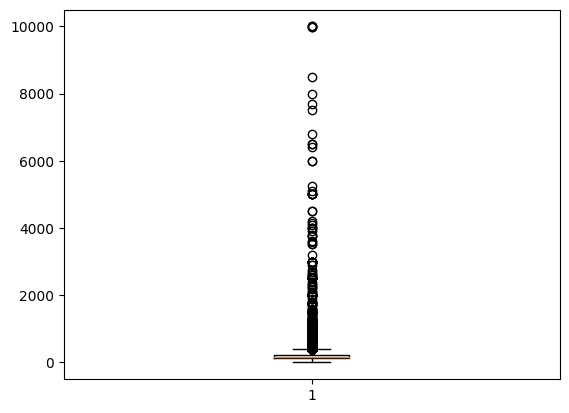

In [5]:
plt.boxplot(priceForHomeApt);

Clearly the outliers above the top whisker are skewing the boxplot since the outliers are significantly further away from the Q3 range.  

To remove these outliers, we can determine the value of the top whisker, and create a filter that removes any value above the top whisker (or more specifically, a filter that keeps any value below the top whisker).

In [6]:
priceStats = priceForHomeApt.describe()
q3 = priceStats['75%']
iqr = priceStats['75%'] - priceStats['25%']
topWhisker = q3 + 1.5 * iqr
topWhisker

392.5

We get the top of the whisker to be 392.5.  Therefore, anything above 392.5 should be considered an outlier.

Percent of data removed:  3.83 %


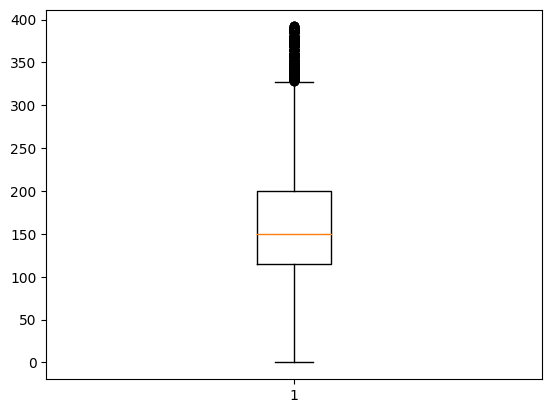

In [100]:
plt.boxplot(priceForHomeApt[priceForHomeApt <= topWhisker]);
print("Percent of data removed: ", round(100 * (sum(priceForHomeApt > topWhisker) / len(AB_NYC_2019)), 2), "%")

Since we filtered out the previous outliers of price in "Entire home/apt", the quartiles are recalculated and we get a new set of outliers.  However, this box plot is significantly easier to work with.

### Method 2: Filter by z-scores

Next we will try filtering by the values of z-scores.  First, let us look at a histogram of the data.

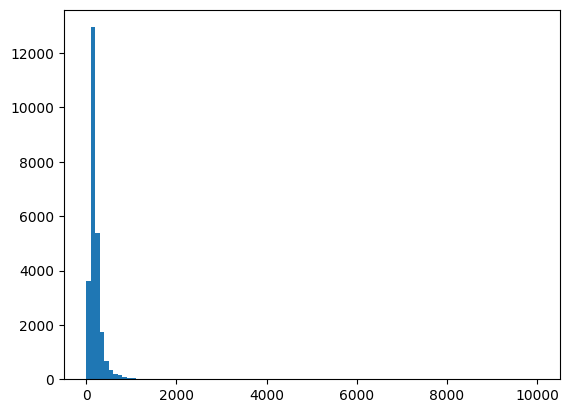

In [101]:
plt.hist(priceForHomeApt, bins = 100);

As we already know, since the plot is trying to display everything, the large values highly skew what the histogram is supposed to look like.

Next, we will calculate the corresponding z-score of each price.

Max z-score:  34.46


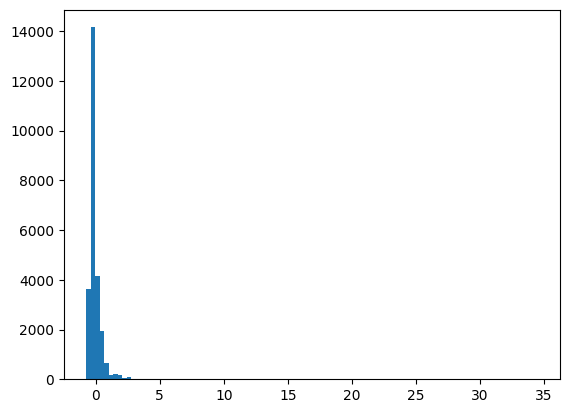

In [102]:
priceMean = np.mean(priceForHomeApt)
priceSTD = np.std(priceForHomeApt)
zscores = (priceForHomeApt - priceMean) / priceSTD
print("Max z-score: ", round(max(zscores), 2))
plt.hist(zscores, bins = 100);

The largest z-score we get is about 34.5, meaning that the largest price value lies just over 34 standard deviations away from the mean.  Given that about 99.7% of values should lie within 3 standard deviations away from the mean (assuming a normal distribution), this is incredibly unusual.

We will make a filter that will remove values that have a z-score greater than 3, and then replot the histogram.  

Percent of data removed:  0.73 %


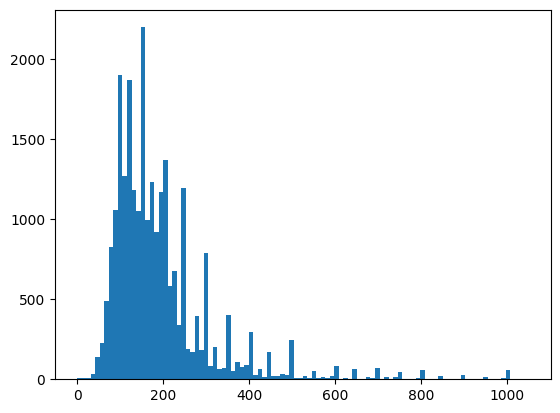

In [103]:
zscoreFilter = zscores <= 3
plt.hist(priceForHomeApt[zscoreFilter], bins = 100);
print("Percent of data removed: ", round(100 * (1 - sum(zscoreFilter) / len(zscoreFilter)), 2), "%")

### Comparring Filter by Boxplot vs Filter by z-score

Below are the histograms after filtering via the boxplot method and the z-score method respectively:

Text(0.5, 1.0, 'Filtered by z-score > 3')

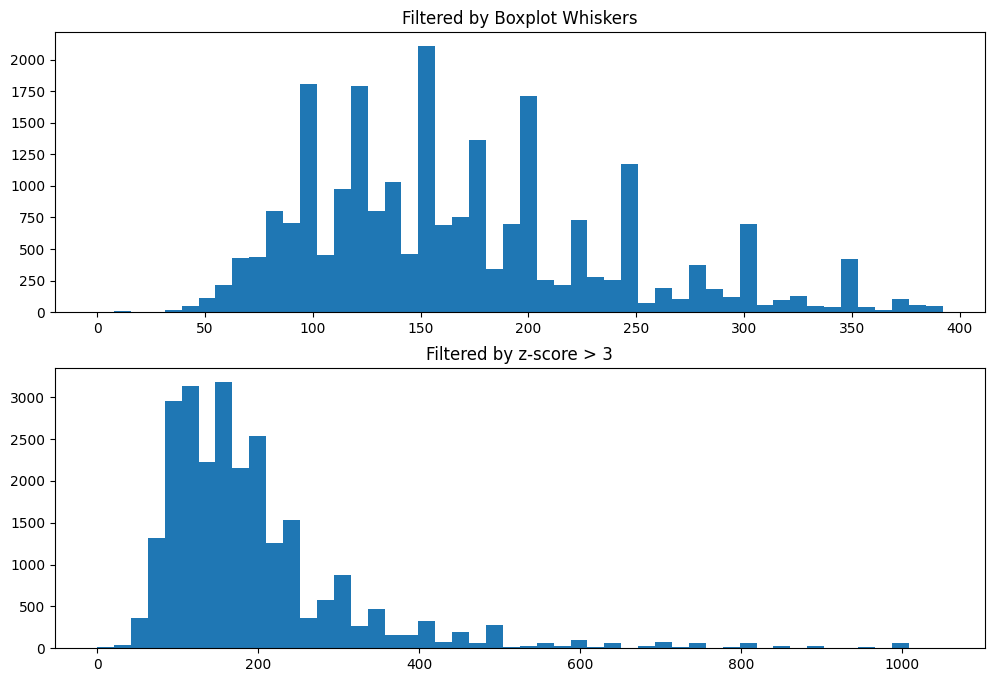

In [105]:
fig, histograms = plt.subplots(2, 1, figsize = (12,8))

histograms[0].hist(priceForHomeApt[priceForHomeApt < topWhisker], bins = 50);
histograms[0].set_title("Filtered by Boxplot Whiskers")
histograms[1].hist(priceForHomeApt[zscoreFilter], bins = 50);
histograms[1].set_title("Filtered by z-score > 3")

Filtering by using boxplot whiskers seems to produce a more centred histogram than filtering by z-score.  However, filtering by z-score could produce a more centred histogram with a better choice of z-score.  For the second histogram above, I arbitrarily chose to filter out anything with z-score > 3, whereas the filter for the first histogram above was calculated based on the Q3 and IQR values of the total data.  After calculating Q3 + 1.5*IQR, the filter for the first histogram came out to be any price above 392.5.  If we chose to filter the data based on the z-score that corresponds to 392.5, then the second histogram produced would be the same as the first histogram.  However, using this method requires us to calculate the boxplot whisker range anyway.  If in both scenarios we choose an optimal filter value based on the whisker values, then in this case it is better to simply filter by boxplot range.

While we will not really be able to see the difference in the dataset, the final filtered dataset based on boxplot ranges will be:

In [106]:
topWhiskerFilter = AB_NYC_2019['price'] > topWhisker
outlierFilterBoxplot = np.invert(roomTypeFilter & topWhiskerFilter) # invert True/False so that we keep elements that do not match criteria instead of remove them
AB_NYC_2019FilteredBoxplot = AB_NYC_2019[outlierFilterBoxplot]
AB_NYC_2019FilteredBoxplot.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
